In [1]:
# EDA

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/AnomalyDetection/
!ls

/content/drive/MyDrive/AnomalyDetection
data		   EDA.ipynb   Main.py.ipynb		   output
DataLoading	   loglizer    ModelExperimentation.ipynb  test_metrics.csv
DataPreprocessing  LogParsing  Models			   Utility


In [5]:
import os
current_directory = os.getcwd()
print(current_directory)
data_dir = current_directory + "/data" # Currengt Data Directory
log_file = "BGL.log" # Log File
print(data_dir)

/content/drive/MyDrive/AnomalyDetection
/content/drive/MyDrive/AnomalyDetection/data


In [6]:
# Data Loading

def concatenate_with_none_values(row):
    return " ".join(filter(lambda x: x is not None, row))

import pandas as pd
import gc
df = pd.read_csv('/content/drive/MyDrive/AnomalyDetection/data/BGL.log', sep='\t', header=None)



In [ ]:
df = df[0].str.split(' ', expand=True)


In [ ]:
df["Combined_Column"] = df.iloc[:, 9:].apply(concatenate_with_none_values, axis=1)
data = df[[0,1,2,3,4,5,6,7,8,'Combined_Column']]
data.columns = ['Label', 'Id', 'Date', 'Code1', 'Time', 'Code2','Component1','Component2','Level','Content']
del df
gc.collect()

# print the len of the dataframe
print("Length of the DataFrame")
print(len(data))

Length of the DataFrame
4747963


In [ ]:
!pip install matplotlib seaborn wordcloud

In [ ]:
df = data.copy()

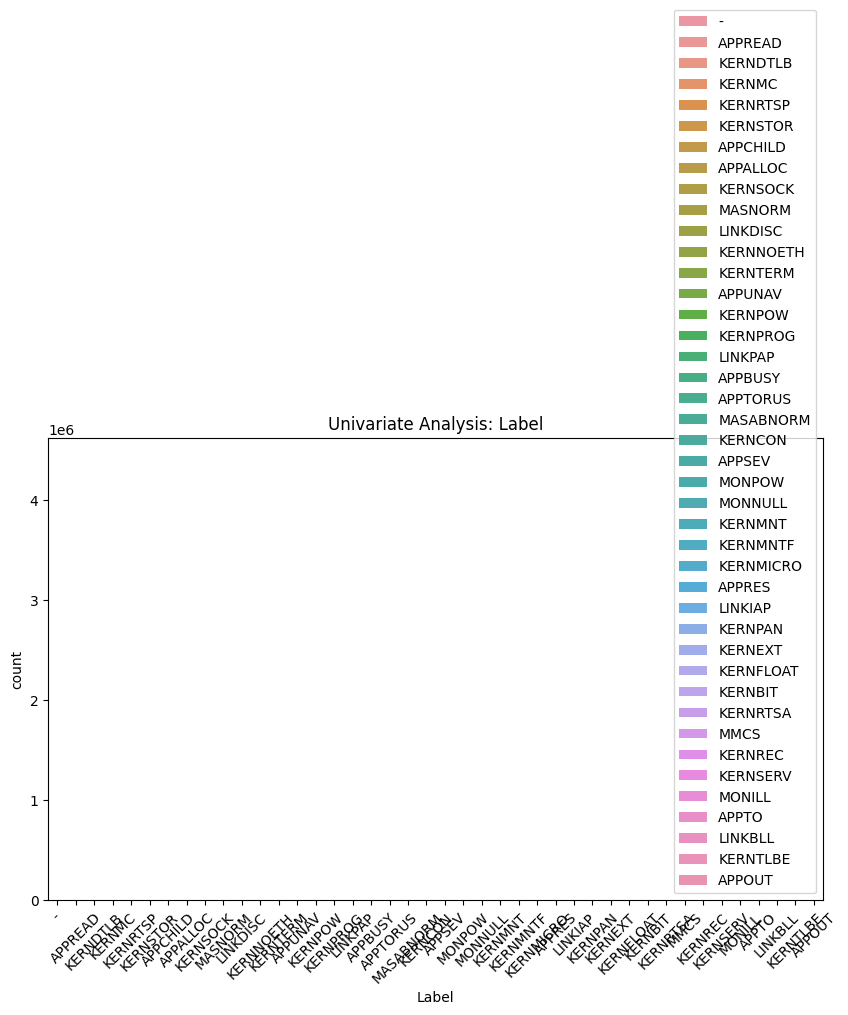

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Univariate Analysis
def univariate_analysis(column_name):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column_name, hue='Label')
    plt.title(f'Univariate Analysis: {column_name}')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Bivariate Analysis
def bivariate_analysis(x_column, y_column):
    plt.figure(figsize=(10, 6))
    grouped_data = df.groupby([x_column, y_column])['Label'].count().unstack()
    grouped_data.plot(kind='bar', stacked=True)
    plt.title(f'Bivariate Analysis: {x_column} vs {y_column}')
    plt.xticks(rotation=45)
    plt.legend(title='Label')
    plt.show()

# Word Cloud
def generate_word_cloud(label):
    text = ' '.join(df[df['Label'] == label]['Content'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {label} Logs')
    plt.axis('off')
    plt.show()

# Perform Analysis
univariate_analysis('Label')


# Note: Adjust column names and visualization settings according to your dataset and preferences.


<Figure size 1000x600 with 0 Axes>

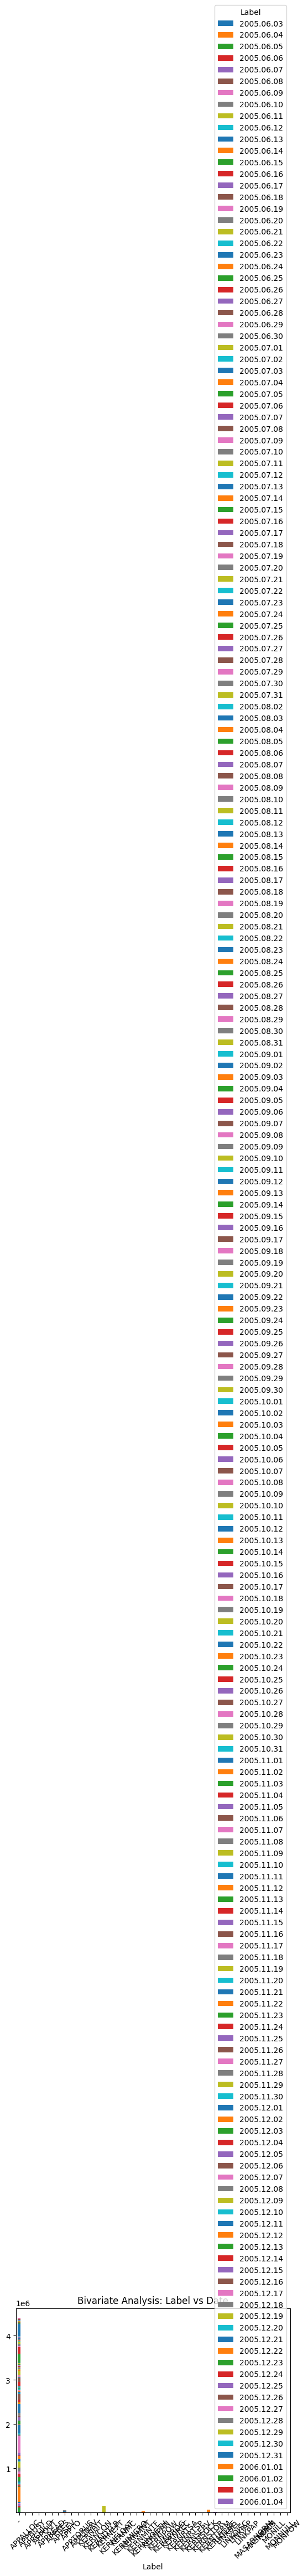

In [ ]:
bivariate_analysis('Label', 'Date')


In [ ]:
data.head()

# - means Normal else abnormal

,Label,Id,Date,Code1,Time,Code2,Component1,Component2,Level,Content
0,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.363779,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected
1,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.527847,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected
2,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.675872,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected
3,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.823719,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected
4,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.982731,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected


In [ ]:
data.describe()

,Label,Id,Date,Code1,Time,Code2,Component1,Component2,Level,Content
count,4747963,4747963,4747963,4747963,4747963,4747963,4747963,4747963,4747963,4747963
unique,42,299849,215,69252,4747955,69258,7,14,10,358357
top,-,1123030909,2005.07.09,R30-M0-N9-C:J16-U01,2005-09-20-12.06.14.325292,R30-M0-N9-C:J16-U01,RAS,KERNEL,INFO,data TLB error interrupt
freq,4399503,393,381827,152329,2,152329,4643432,4324651,3735813,152734


In [ ]:
data.shape

(4747963, 10)

In [ ]:
data.columns

Index(['Label', 'Id', 'Date', 'Code1', 'Time', 'Code2', 'Component1',
       'Component2', 'Level', 'Content'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4747963 entries, 0 to 4747962
Data columns (total 10 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Label       object
 1   Id          object
 2   Date        object
 3   Code1       object
 4   Time        object
 5   Code2       object
 6   Component1  object
 7   Component2  object
 8   Level       object
 9   Content     object
dtypes: object(10)
memory usage: 362.2+ MB


In [ ]:
# No Null Values
data.isnull().sum()

Label         0
Id            0
Date          0
Code1         0
Time          0
Code2         0
Component1    0
Component2    0
Level         0
Content       0
dtype: int64

In [ ]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 32.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=a08313b5d9833476e0646161d295bbb1c55e56f4464fe0b7bcd871e4907f8a7c
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.1.1
    Uninstalling pydantic-2.

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport

<ipython-input-10-98f09099f855>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
profile = ProfileReport(data, title='Pandas Profiling Report', explorative=True)


In [ ]:
profile.to_widgets()  # Display in Jupyter Notebook or JupyterLab
# Or save the report as an HTML file:
profile.to_file('/content/drive/MyDrive/AnomalyDetection/data/output_report.html')

/usr/local/lib/python3.10/dist-packages/pandas_profiling/profile_report.py:457: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
current_directory

'/content/drive/MyDrive/AnomalyDetection'

In [ ]:
from IPython.display import display, HTML
output_file = current_directory + "/data/output_report.html"
# Read the HTML content from the file
with open("/content/drive/MyDrive/AnomalyDetection/data/output_report.html","r") as file:
    html_content = file.read()

# Display the HTML content in the notebook
display(HTML(html_content))

Number of variables,10
Number of observations,4747963
Missing cells,0
Missing cells (%),0.0%
Duplicate rows,4
Duplicate rows (%),< 0.1%
Total size in memory,3.2 GiB
Average record size in memory,716.5 B
Categorical,9
Numeric,1
Dataset has 4 (< 0.1%) duplicate rows,Duplicates


In [ ]:
# Data Cleaning , Feature Engineering and PreProcessing

In [ ]:
from DataLoading.DataLoader import *
from DataPreprocessing.Processing import *
import os
import gc
from sklearn.utils import shuffle
import numpy as np
if __name__ == "__main__":

    current_directory = os.getcwd()
    data_dir = current_directory + "/data"
    output_dir = current_directory + "/output"
    log_file = "BGL.log"
    print(data_dir + "\n" + output_dir)
    dataobj = DataLoader(log_file)
    dataobj.log_parser(data_dir, output_dir, log_file)

    """
    def log_parser(self,input_dir, output_dir, log_file):
        #This function will use the Drain parser and generate the Structured and Event Template files
        log_format = '<Label> <Id> <Date> <Code1> <Time> <Code2> <Component1> <Component2> <Level> <Content>'
        regex = [
            r'(0x)[0-9a-fA-F]+', #hexadecimal
            r'\d+.\d+.\d+.\d+',
            r'\d+'  # phone number in the format +CountryCode-AreaCode-PhoneNumber
        ]

        keep_para = False
        # the hyper parameter is set according to http://jmzhu.logpai.com/pub/pjhe_icws2017.pdf
        st = 0.4  # Similarity threshold
        depth = 3  # Depth of all leaf nodes
        parser = LogParser(log_format,indir=input_dir,outdir=output_dir,depth=depth,st=st,rex=regex, keep_para=keep_para)
        parser.parse(log_file)
    """

/content/drive/MyDrive/AnomalyDetection/data
/content/drive/MyDrive/AnomalyDetection/output


In [ ]:
df_templates = pd.read_csv(f'{output_dir}/{log_file}_templates.csv')

In [ ]:
df_templates.head()

,EventId,EventTemplate,Occurrences
0,3aa50e45,instruction cache parity error corrected,105924
1,b9250ad9,MidplaneSwitchController performing bit sparin...,964
2,fc5f0940,generating core.<*>,1706751
3,1840cbfe,<*> ddr errors(s) detected and corrected on ra...,33939
4,828a502b,<*> <*> <*> error(s) (dcr <*>) detected and co...,5040


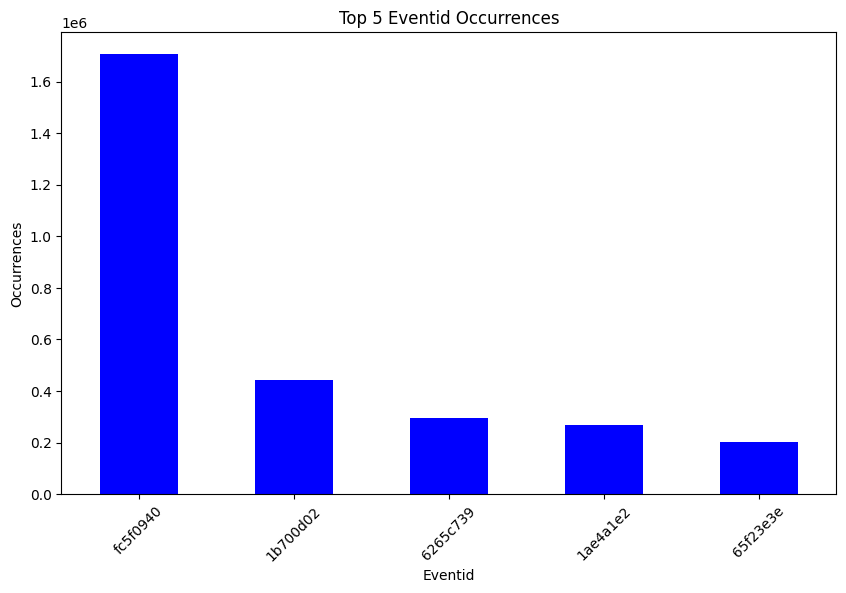

In [ ]:
# Calculate frequency distribution of Eventid occurrences
import pandas as pd
import matplotlib.pyplot as plt
eventid_counts = df_templates.groupby('EventId')['Occurrences'].sum().sort_values(ascending=False)

# Get top 5 occurrences
top_eventid_counts = eventid_counts.head(5)

# Plotting bivariate analysis
plt.figure(figsize=(10, 6))
top_eventid_counts.plot(kind='bar', color='blue')
plt.title('Top 5 Eventid Occurrences')
plt.xlabel('Eventid')
plt.ylabel('Occurrences')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df = pd.read_csv(f'{output_dir}/{log_file}_structured.csv')

In [ ]:
df.head()

,LineId,Label,Id,Date,Code1,Time,Code2,Component1,Component2,Level,Content,EventId,EventTemplate
0,1,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.363779,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
1,2,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.527847,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
2,3,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.675872,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
3,4,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.823719,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
4,5,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.982731,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected


In [ ]:
# Grouping by Label and EventID, then counting occurrences
event_counts = df.groupby(['Label', 'EventId']).size().reset_index(name='Occurrences')

# Finding the top event IDs for each label category
top_event_ids = event_counts.groupby('Label').apply(lambda group: group.nlargest(1, 'Occurrences'))

print(top_event_ids)

                    Label   EventId  Occurrences
Label                                           
-         1265          -  fc5f0940      1706751
APPALLOC  1282   APPALLOC  4496b375          144
APPBUSY   1283    APPBUSY  0fae9ddc          512
APPCHILD  1284   APPCHILD  4496b375          320
APPOUT    1285     APPOUT  083912c3          816
APPREAD   1286    APPREAD  183ff96a         5983
APPRES    1288     APPRES  8fab64d7         2256
APPSEV    1290     APPSEV  8fab64d7        26546
APPTO     1291      APPTO  5eeb7c0e         1991
APPTORUS  1292   APPTORUS  89c713e5           10
APPUNAV   1293    APPUNAV  4496b375         2048
KERNBIT   1294    KERNBIT  e60185c5            1
KERNCON   1295    KERNCON  f331f27a           16
KERNDTLB  1296   KERNDTLB  fd2fdc47       152734
KERNEXT   1297    KERNEXT  810c7f78            1
KERNFLOAT 1298  KERNFLOAT  1bff92a7            3
KERNMC    1303     KERNMC  ce2b6cdc          161
KERNMICRO 1304  KERNMICRO  04f5a2ae         1503
KERNMNT   1305    KE

In [ ]:
df['Label'].value_counts()

-            4365033
KERNDTLB      152734
KERNSTOR       63491
APPSEV         49651
KERNMNTF       31531
KERNTERM       23338
KERNREC         6145
APPREAD         5983
KERNRTSP        3983
APPRES          2370
APPUNAV         2048
APPTO           1991
KERNMICRO       1503
APPOUT           816
KERNMNT          720
APPBUSY          512
KERNMC           342
APPCHILD         320
KERNSOCK         209
KERNPOW          192
LINKIAP          166
APPALLOC         144
KERNSERV          94
MASABNORM         37
LINKDISC          24
KERNPAN           18
KERNCON           16
KERNNOETH         14
LINKPAP           14
MONPOW            12
MASNORM           10
APPTORUS          10
KERNPROG           5
MMCS               3
KERNFLOAT          3
KERNRTSA           3
LINKBLL            2
MONNULL            2
KERNBIT            1
MONILL             1
KERNEXT            1
KERNTLBE           1
Name: Label, dtype: int64

In [ ]:
# data preprocess
df['datetime'] = pd.to_datetime(df['Time'], format='%Y-%m-%d-%H.%M.%S.%f')
df["Label"] = df["Label"].apply(lambda x: int(x != "-"))
df['timestamp'] = df["datetime"].values.astype(np.int64) // 10 ** 9
df['deltaT'] = df['datetime'].diff() / np.timedelta64(1, 's')
df['deltaT'].fillna(0,inplace=True) # This will capture the temporal difference

In [ ]:
df.head()

,LineId,Label,Id,Date,Code1,Time,Code2,Component1,Component2,Level,Content,EventId,EventTemplate,datetime,timestamp,deltaT
0,1,0,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.363779,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,2005-06-03 15:42:50.363779,1117813370,0.000000
1,2,0,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.527847,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,2005-06-03 15:42:50.527847,1117813370,0.164068
2,3,0,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.675872,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,2005-06-03 15:42:50.675872,1117813370,0.148025
3,4,0,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.823719,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,2005-06-03 15:42:50.823719,1117813370,0.147847
4,5,0,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.982731,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,2005-06-03 15:42:50.982731,1117813370,0.159012


In [ ]:
# Sliding Window Implementation
window_size = 5
step_size = 1
train_ratio = 0.4

logdf = dataobj.sliding_windows(df[["timestamp", "Label", "EventId", "deltaT"]],window_size,step_size)
logdf.head()

there are 37315 instances (sliding windows) in this dataset



,timestamp,Label,EventId,deltaT
0,"[1117813370, 1117813370, 1117813370, 111781337...",0,"[3aa50e45, 3aa50e45, 3aa50e45, 3aa50e45, 3aa50...","[0.0, 0.164068, 0.148025, 0.147847, 0.159012, ..."
1,"[1117813430, 1117813430, 1117813430, 111781343...",0,"[3aa50e45, 3aa50e45, 3aa50e45, 3aa50e45, 3aa50...","[0.0, 0.154454, 0.15088, 0.137283, 0.165617, 6..."
2,"[1117813490, 1117813490, 1117813490, 111781349...",0,"[3aa50e45, 3aa50e45, 3aa50e45, 3aa50e45, 3aa50...","[0.0, 0.136003, 0.169535, 0.158248, 0.141224, ..."
3,"[1117813550, 1117813550, 1117813550, 111781355...",0,"[3aa50e45, 3aa50e45, 3aa50e45, 3aa50e45, 3aa50...","[0.0, 0.158966, 0.136016, 0.160414, 0.148952, ..."
4,"[1117813610, 1117813610, 1117813610, 111781361...",0,"[3aa50e45, 3aa50e45, 3aa50e45, 3aa50e45, 3aa50...","[0.0, 0.286636, 0.148804, 0.307791, 0.290853, ..."


In [ ]:
from DataPreprocessing.Processing import *
from DataLoading.DataLoader import *

processingobj = Processing(df)

#Segregating Normal and Abnormal data and storing the data to output directory

print("\nSegregating Normal and Abnormal data and storing the data to output directory\n")

processingobj.train_test_data(logdf,train_ratio,output_dir)


Segregating Normal and Abnormal data and storing the data to output directory


 Normal Logs Training and Testing

Train normal log size 20578
Test Normal size 13719
Train Abnormal logs size 1810
Test Abnormal logs size 1208

Validate file path
 /content/drive/MyDrive/AnomalyDetection/output/train_abnormal


In [ ]:
#Loading Normal Data

print("\nLoading Normal Data\n")

train_normal,test_normal = processingobj.load_normal_data(output_dir)


Loading Normal Data

Train & Test Directory /content/drive/MyDrive/AnomalyDetection/output


/content/drive/MyDrive/AnomalyDetection/DataPreprocessing/Processing.py:84: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_normal = np.array(train_normal).reshape(-1,1)
/content/drive/MyDrive/AnomalyDetection/DataPreprocessing/Processing.py:91: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_normal = np.array(test_normal).reshape(-1,1)


In [ ]:
    #Loading Abnormal Data

    print("\nLoading Abnormal Data\n")

    train_abnormal,test_abnormal = processingobj.load_abnormal_data(output_dir)


Loading Abnormal Data

Train & Test Directory /content/drive/MyDrive/AnomalyDetection/output


/content/drive/MyDrive/AnomalyDetection/DataPreprocessing/Processing.py:107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_abnormal = np.array(train_abnormal).reshape(-1,1)
/content/drive/MyDrive/AnomalyDetection/DataPreprocessing/Processing.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_abnormal = np.array(test_abnormal).reshape(-1,1)


In [ ]:
    #Consolidate Training normal and abnormal data

    print("\n Consolidate Normal and Abnormal logs - Training set : x_train and y_train\n")

    x_train,y_train = processingobj.consolidate_normal_abnormal_logs(train_normal,train_abnormal,"train")

    assert len(x_train) == len(y_train)

    print("x_train size : {},y_train size :{}".format(len(x_train),len(y_train)))


 Consolidate Normal and Abnormal logs - Training set : x_train and y_train

train Normal and Abnormal dataset
x_train size : 22388,y_train size :22388


In [ ]:
x_train[1],y_train[1]

(['3aa50e45', 'ba77ab8e'], 0.0)

In [ ]:
    #Convert EventidTonNumber Training data

    print("Convert EventidTonNumber Training data")

    x_train = processingobj.convert_eventidTonumber(log_file,x_train,output_dir)

Convert EventidTonNumber Training data
Total logkey(exclude 0:UNK) 1325


In [ ]:
    #Consolidate Test normal and abnormal data

    print("\n Consolidate Normal and Abnormal logs - Test set : x_test and y_test\n")

    x_test,y_test = processingobj.consolidate_normal_abnormal_logs(test_normal,test_abnormal,"test")

    assert len(x_test) == len(y_test)

    print("x_test size : {},y_test size :{}".format(len(x_test),len(y_test)))


 Consolidate Normal and Abnormal logs - Test set : x_test and y_test

test Normal and Abnormal dataset
x_test size : 14927,y_test size :14927


In [ ]:
type(x_test),type(y_test)

(numpy.ndarray, numpy.ndarray)

In [ ]:
    #Convert EventidTonNumber Test data

    print("Convert EventidTonNumber Test data")

    x_test = processingobj.convert_eventidTonumber(log_file,x_test,output_dir)


Convert EventidTonNumber Test data
Total logkey(exclude 0:UNK) 1325


In [7]:

import argparse
import numpy as np
import pandas as pd
import random
from importlib import reload
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.utils import shuffle
from loglizer import dataloader, preprocessing
from loglizer.utils import metrics
from loglizer.models import PCA, IsolationForest, OneClassSVM, LogClustering

In [ ]:
feature_extractor = preprocessing.FeatureExtractor()
x_train = feature_extractor.fit_transform(x_train)
x_test = feature_extractor.transform(x_test)

====== Transformed train data summary ======
Train data shape: 22388-by-1241

====== Transformed test data summary ======


/content/drive/MyDrive/AnomalyDetection/loglizer/preprocessing.py:133: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_df[event] = [0] * len(X_df)
/content/drive/MyDrive/AnomalyDetection/loglizer/preprocessing.py:133: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_df[event] = [0] * len(X_df)
/content/drive/MyDrive/AnomalyDetection/loglizer/preprocessing.py:133: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all c

Test data shape: 14927-by-1241



In [ ]:
x_train[1]

array([1., 1., 0., ..., 0., 0., 0.])